Saving train.csv to train (2).csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<ipython-input-3-505990691>:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
<ipython-input-3-505990691>:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

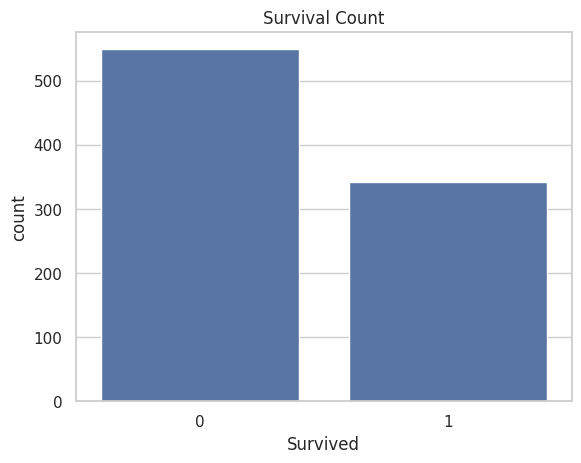

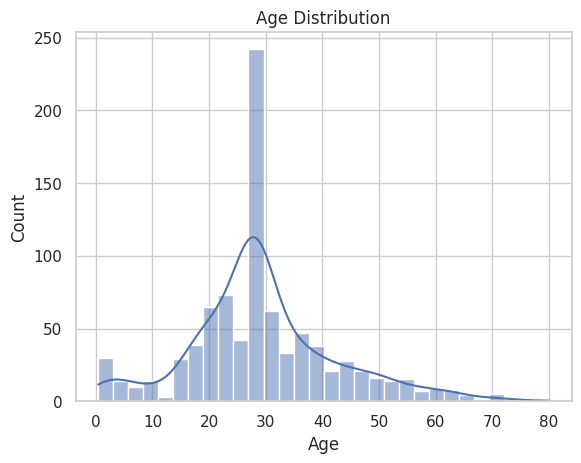

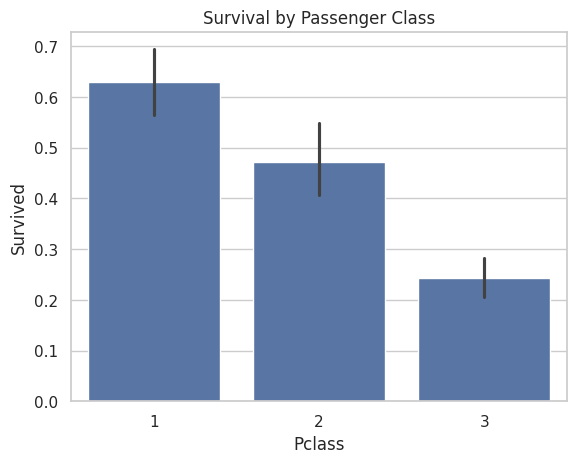

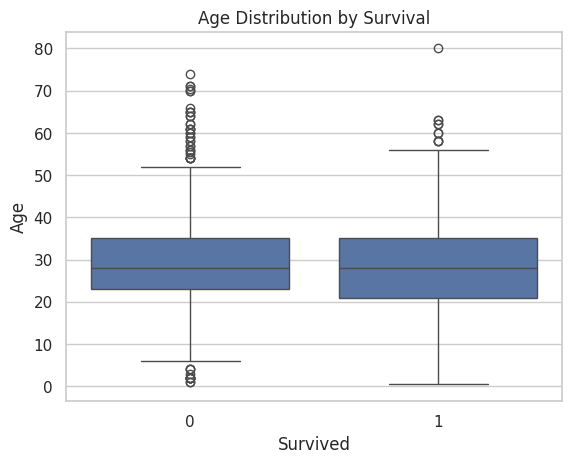

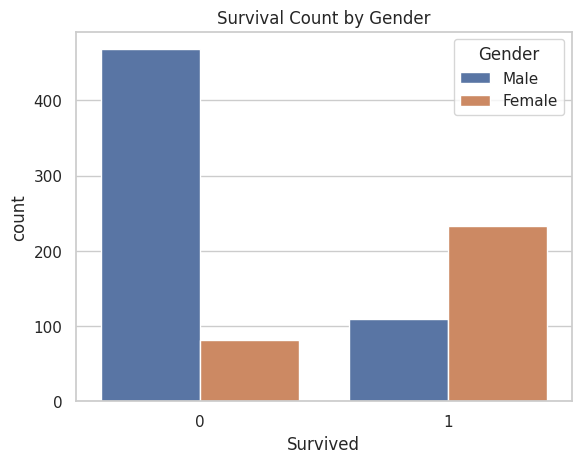

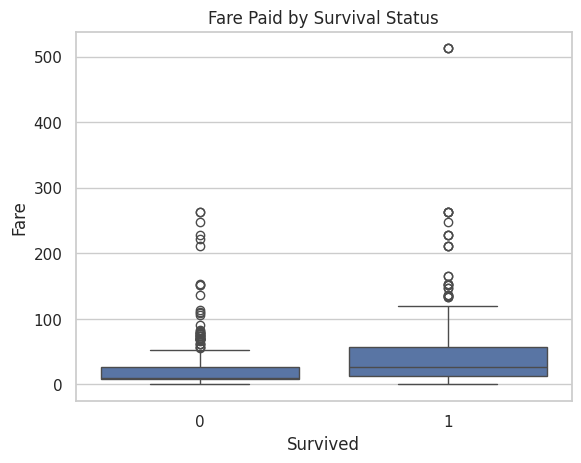

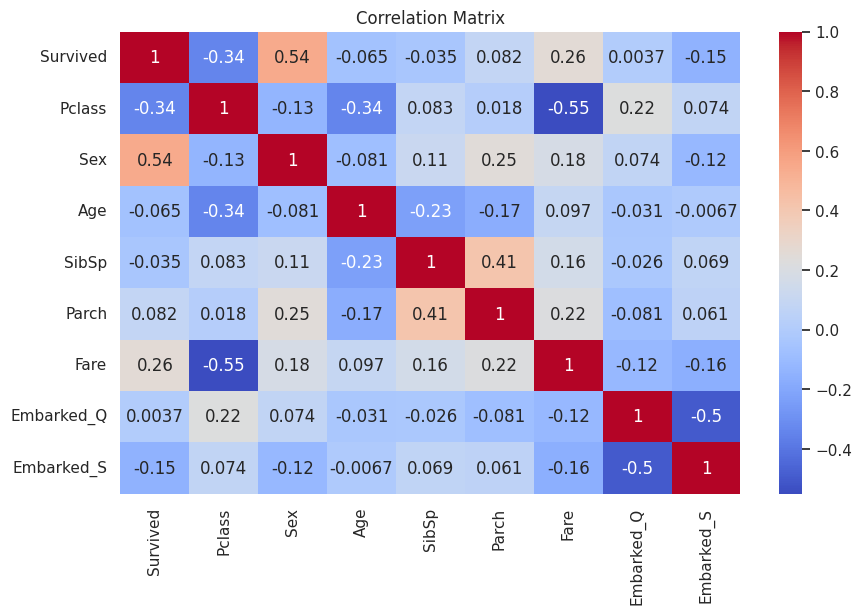

In [3]:
import pandas as pd        # for data manipulation
import numpy as np         # for numerical operations
import matplotlib.pyplot as plt  # for basic plotting
import seaborn as sns      # for advanced visualization

sns.set(style='whitegrid')

from google.colab import files
uploaded = files.upload()



import io
df = pd.read_csv('train.csv')

#df = pd.read_csv(io.BytesIO(uploaded['train.csv']))  # replace with actual filename

df.head()
df.info()
df.describe()

df.isnull().sum()
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.drop(columns=['Cabin'], inplace=True)
df.drop(columns=['Name', 'Ticket', 'PassengerId'], inplace=True)

df['Sex'] = df['Sex'].map({'male': 0, 'female': 1 })
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Survived', data=df)
plt.title('Survival Count')
plt.show()
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')
plt.show()
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival by Passenger Class')
plt.show()
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Age Distribution by Survival')
plt.show()
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title('Survival Count by Gender')
plt.legend(title='Gender', labels=['Male', 'Female'])
plt.show()
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title('Fare Paid by Survival Status')
plt.show()



plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()



